# Chapter 3: Binary classification problem
## Lab 3: Pokemon Combat Prediction
https://www.kaggle.com/terminus7/pokemon-challenge

The characteristics of each Pokemon are described as follows:    
- Name: Pokemon name.
- Type 1: The first attribute.
- Type 2: The second attribute. 
- HP: Hitpoint.
- Attack: Attack force.
- Defense: Defense point.
- Sp. Atk: Special attack force.
- Sp. Def: Special defense point
- Speed: Speed of Pokemon
- Generation: Evolutionary stage.
- Legendary: Legendary Pokemon.


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/taipeitechmmslab/MMSLAB-DL/blob/master/Lab3.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

### a) Import packages

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

### b) Reading and converting data

•	Read Pokemon data from CSV file:

In [5]:
pokemon_df = pd.read_csv('./Dataset/pokemon-challenge/pokemon.csv')  # read data
pokemon_df.head()  

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


•	Set "#" as index value:

In [6]:
pokemon_df= pokemon_df.set_index("#")  
pokemon_df.head()  

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


•	Read combats data:

In [8]:
combats_df = pd.read_csv('./Dataset/pokemon-challenge/combats.csv')  
combats_df.head()  

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


•	Check if there is any missing data in Pokemon data:

In [9]:
pokemon_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB


•	Second attribute (Type 2):

By setting the parameter “dropna=False”, the missing data (NaN) can be taken into account. NaN means that Pokemon does not have the second attribute.

In [10]:
pokemon_df["Type 2"].value_counts(dropna =False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Water        14
Ice          14
Rock         14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

•	Fill in missing data: replace "NaN" with "empty"

In [11]:
pokemon_df["Type 2"].fillna('empty',inplace=True)
pokemon_df["Type 2"].value_counts()

empty       386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Ghost        14
Water        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

•	Checking data type:

In [12]:
print(combats_df.dtypes)  
print('-' * 30)
print(pokemon_df.dtypes)  

First_pokemon     int64
Second_pokemon    int64
Winner            int64
dtype: object
------------------------------
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


•	Conversion of data type: 

In [13]:
pokemon_df['Type 1'] = pokemon_df['Type 1'].astype('category') # Convert Type1 to category type
pokemon_df['Type 2'] = pokemon_df['Type 2'].astype('category') # Convert Type2 to category type
pokemon_df['Legendary'] = pokemon_df['Legendary'].astype('int') # Convert Legendary to int data type
pokemon_df.dtypes  

Name            object
Type 1        category
Type 2        category
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary        int32
dtype: object

•	Using One-hot Encoding to represent the attributes (Type1 and Type2). 

In [15]:
# Use get_dummies function for converting the Type 1: 
df_type1_one_hot = pd.get_dummies(pokemon_df['Type 1'])   
df_type1_one_hot.head()  

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
#,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [16]:
#Use get_dummies function for converting the Type 2: 

df_type2_one_hot = pd.get_dummies(pokemon_df['Type 2'])  
df_type2_one_hot.head()  

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Combine two sets of One-hot Encoding

In [17]:
# Combine Type1 and Type2 - One-hot Encoding
combine_df_one_hot = df_type1_one_hot.add(df_type2_one_hot, fill_value=0).astype('int64')
# Set the number of display columns to 30
pd.options.display.max_columns = 30
pokemon_df = pokemon_df.join(combine_df_one_hot)
pokemon_df.head()  

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,Fire,empty,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


•	Convert attributes of Pokemons into numerical values (0, 1, 2, …18):

In [18]:
dict(enumerate(pokemon_df['Type 2'].cat.categories))

{0: 'Bug',
 1: 'Dark',
 2: 'Dragon',
 3: 'Electric',
 4: 'Fairy',
 5: 'Fighting',
 6: 'Fire',
 7: 'Flying',
 8: 'Ghost',
 9: 'Grass',
 10: 'Ground',
 11: 'Ice',
 12: 'Normal',
 13: 'Poison',
 14: 'Psychic',
 15: 'Rock',
 16: 'Steel',
 17: 'Water',
 18: 'empty'}

The encoding value of the attributes can be received through “cat.codes”

In [19]:
pokemon_df['Type 2'].cat.codes.head(10)

#
1     13
2     13
3     13
4     13
5     18
6     18
7      7
8      2
9      7
10    18
dtype: int8

Use numerical representation (0, 1, 2…18) to replace the original label of attributes

In [20]:
pokemon_df['Type 1'] = pokemon_df['Type 1'].cat.codes
pokemon_df['Type 2'] = pokemon_df['Type 2'].cat.codes
pokemon_df.head()  

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


•	Remove unused data (name):

In [21]:
pokemon_df.drop('Name', axis='columns', inplace=True)
pokemon_df.head()  

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


•	Using 0 and 1 to represent the winner in the Pokemon combat data: 0 means the winner is first Pokemon, 1 means the winner is second Pokemon.

In [22]:
combats_df['Winner'] = combats_df.apply(lambda x: 0 
                                        if x.Winner == x.First_pokemon else 1, 
                                        axis='columns')
combats_df.head() 

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0


### c)	Data division

Pokemon dataset is divided into 3 sets including training data, validation data, and test data with the ratio of 6, 2, and 2, respectively

In [40]:
data_num = combats_df.shape[0]
# Get a random index equal to the number of data
indexes = np.random.permutation(data_num)
# Randomly divide data into Train, validation and test, here the division ratio is 6:2:2
train_indexes = indexes[:int(data_num *0.6)]
val_indexes = indexes[int(data_num *0.6):int(data_num *0.8)]
test_indexes = indexes[int(data_num *0.8):]
# data
train_data = combats_df.loc[train_indexes]
val_data = combats_df.loc[val_indexes]
test_data = combats_df.loc[test_indexes]

•	Normalize Type1 and Type 2 to limit each element between 0~1 (there are 19 attributes including the empty attribute) 

In [41]:
pokemon_df['Type 1'] = pokemon_df['Type 1'] / 19
pokemon_df['Type 2'] = pokemon_df['Type 2'] / 19


•	Use Standard Score to standardize the values of characteristics of Pokemons  

In [42]:
mean = pokemon_df.loc[:, 'HP':'Generation'].mean()  
std = pokemon_df.loc[:, 'HP':'Generation'].std()  

pokemon_df.loc[:,'HP':'Generation'] = (pokemon_df.loc[:,'HP':'Generation']-mean)/std
pokemon_df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.024931,0.036011,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0.024931,0.036011,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.024931,0.036011,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.024931,0.036011,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,0.016620,0.049861,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


Convert training data in Numpy array format.

In [43]:
x_train_index = np.array(train_data.drop('Winner', axis='columns'))
x_val_index = np.array(val_data.drop('Winner', axis='columns'))
x_test_index = np.array(test_data.drop('Winner', axis='columns'))
print(x_train_index)

[[ 96 457]
 [279 118]
 [645 616]
 ...
 [399 594]
 [ 47  28]
 [209  18]]


•	Prepare data for training from the combat data:

In [44]:
y_train = np.array(train_data['Winner'])
y_val = np.array(val_data['Winner'])
y_test = np.array(test_data['Winner'])

•	Prepare two different input data:

The first type: Pokemon’s attributes (Type1 and Type2) are represented by using numerical values.

In [45]:
# Get Pokemon's characteristics (10 characteristics: Type1, Type2, HP …to Legendary)
pokemon_data_normal = np.array(pokemon_df.loc[:, :'Legendary'])
print(pokemon_data_normal.shape)
# Generate input data 
x_train_normal = pokemon_data_normal[x_train_index -1].reshape((-1, 20))
x_val_normal = pokemon_data_normal[x_val_index -1].reshape((-1, 20))
x_test_normal = pokemon_data_normal[x_test_index -1].reshape((-1, 20))
print(x_train_normal.shape)

(800, 10)
(30000, 20)


The second type: Pokemon's attributes are represented by using One-hot Encoding.

In [46]:
# # Get Pokemon's characteristics HP, attack,…Legendary, bug, dark,… (Type1 and Type2 are represented by one hot encoding)  
pokemon_data_one_hot = np.array(pokemon_df.loc[:, 'HP':])
print(pokemon_data_one_hot.shape)
# Generate input data 
x_train_one_hot = pokemon_data_one_hot[x_train_index -1].reshape((-1, 54))
x_val_one_hot = pokemon_data_one_hot[x_val_index -1].reshape((-1, 54))
x_test_one_hot = pokemon_data_one_hot[x_test_index -1].reshape((-1, 54))
print(x_train_one_hot.shape)

(800, 27)
(30000, 54)


### Building and Training Network Models

### Model-1

The input of Model-1 is the data of two Pokemons, each Pokemon has 10 different characteristics, so the input size is (20, ).

In [47]:
inputs = keras.Input(shape=(20, ))  
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x)

# outputs = layers.Dense(1, activation='sigmoid')(x)
outputs = layers.Dense(1)(x)

# creating model
model_1 = keras.Model(inputs, outputs, name='model-1')
model_1.summary()  # Show network architecture

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                1344      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0   

•	Create a storage directory for saving model: 

In [48]:
model_dir = 'lab3-logs/models'  
os.makedirs(model_dir)  

•	Set the callback function:

In [49]:
# Save training records as TensorBoard log files
log_dir = os.path.join('lab3-logs', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# Save the best model 
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5', 
                                             monitor='val_binary_accuracy', 
                                             save_best_only=True, 
                                             mode='max')

•	Set the optimizer, loss function, and metric function for training the model:

In [50]:
model_1.compile(keras.optimizers.Adam(),
               # loss=keras.losses.BinaryCrossentropy(), 
               loss=keras.losses.BinaryCrossentropy(from_logits=True), 
               metrics=[keras.metrics.BinaryAccuracy()])

•	Training model:

In [51]:
history_1 = model_1.fit(x_train_normal, y_train, 
                batch_size=64 ,
                epochs=200, 
                validation_data=(x_val_normal, y_val),
                callbacks=[model_cbk, model_mckp])

Epoch 1/200
  1/469 [..............................] - ETA: 0s - loss: 0.7478 - binary_accuracy: 0.4062WARNING:tensorflow:From C:\Users\hieu\tf2\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
469/469 [==============================] - 1s 2ms/step - loss: 0.4168 - binary_accuracy: 0.8122 - val_loss: 0.2989 - val_binary_accuracy: 0.9108
Epoch 2/200
469/469 [==============================] - 1s 2ms/step - loss: 0.3091 - binary_accuracy: 0.8917 - val_loss: 0.2351 - val_binary_accuracy: 0.9248
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2573 - binary_accuracy: 0.9132 - val_loss: 0.2010 - val_binary_accuracy: 0.9332
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2319 - binary_accuracy: 0.9197 - val_loss: 0.1942 - val_binary_accuracy: 0.9308
Epoch 

469/469 [==============================] - 1s 2ms/step - loss: 0.1647 - binary_accuracy: 0.9470 - val_loss: 0.1672 - val_binary_accuracy: 0.9462
Epoch 48/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1656 - binary_accuracy: 0.9458 - val_loss: 0.1698 - val_binary_accuracy: 0.9465
Epoch 49/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1622 - binary_accuracy: 0.9456 - val_loss: 0.1704 - val_binary_accuracy: 0.9453
Epoch 50/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1628 - binary_accuracy: 0.9451 - val_loss: 0.1717 - val_binary_accuracy: 0.9455
Epoch 51/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1627 - binary_accuracy: 0.9471 - val_loss: 0.1679 - val_binary_accuracy: 0.9471
Epoch 52/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1644 - binary_accuracy: 0.9457 - val_loss: 0.1689 - val_binary_accuracy: 0.9485
Epoch 53/200
469/469 [==============================] - 1s 2ms/st

Epoch 99/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1557 - binary_accuracy: 0.9483 - val_loss: 0.1663 - val_binary_accuracy: 0.9469
Epoch 100/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1553 - binary_accuracy: 0.9488 - val_loss: 0.1644 - val_binary_accuracy: 0.9477
Epoch 101/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1549 - binary_accuracy: 0.9486 - val_loss: 0.1662 - val_binary_accuracy: 0.9461
Epoch 102/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1548 - binary_accuracy: 0.9482 - val_loss: 0.1682 - val_binary_accuracy: 0.9453
Epoch 103/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1537 - binary_accuracy: 0.9503 - val_loss: 0.1702 - val_binary_accuracy: 0.9474
Epoch 104/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1549 - binary_accuracy: 0.9479 - val_loss: 0.1681 - val_binary_accuracy: 0.9454
Epoch 105/200
469/469 [========================

469/469 [==============================] - 1s 2ms/step - loss: 0.1506 - binary_accuracy: 0.9505 - val_loss: 0.1659 - val_binary_accuracy: 0.9481
Epoch 151/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1513 - binary_accuracy: 0.9494 - val_loss: 0.1648 - val_binary_accuracy: 0.9489
Epoch 152/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1519 - binary_accuracy: 0.9496 - val_loss: 0.1627 - val_binary_accuracy: 0.9483
Epoch 153/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1516 - binary_accuracy: 0.9506 - val_loss: 0.1632 - val_binary_accuracy: 0.9483
Epoch 154/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1512 - binary_accuracy: 0.9490 - val_loss: 0.1667 - val_binary_accuracy: 0.9485
Epoch 155/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1515 - binary_accuracy: 0.9509 - val_loss: 0.1705 - val_binary_accuracy: 0.9419
Epoch 156/200
469/469 [==============================] - 1s 

### b)	Model-2

The input of the Model-2 is the data of two Pokemons, each Pokemon has 27 different information, so the input size of the two Pokemon is (54, ).

In [52]:
inputs = keras.Input(shape=(54, )) 
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x)

# output
outputs = layers.Dense(1)(x)
# outputs = layers.Dense(1, activation='sigmoid')(x)

# create model
model_2 = keras.Model(inputs, outputs, name='model-2')
model_2.summary() 

Model: "model-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 54)]              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                3520      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0   

•	Set the callback function:

In [53]:
# Save training records as TensorBoard log files
log_dir = os.path.join('lab3-logs', 'model-2')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# save the best model
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-2.h5', 
                                         monitor='val_binary_accuracy', 
                                         save_best_only=True, 
                                         mode='max')

•	Set the optimizer, loss function, and metric function for training the model:

In [54]:
model_2.compile(keras.optimizers.Adam(), 
               # loss=keras.losses.BinaryCrossentropy(), 
               loss=keras.losses.BinaryCrossentropy(from_logits=True), 
               metrics=[keras.metrics.BinaryAccuracy()])

•	Training model

In [55]:
history_2 = model_2.fit(x_train_one_hot, y_train, 
                    batch_size=64 ,
                    epochs=200, 
                    validation_data=(x_val_one_hot, y_val), 
                    callbacks=[model_cbk, model_mckp])

Epoch 1/200
469/469 [==============================] - 2s 3ms/step - loss: 0.4169 - binary_accuracy: 0.8175 - val_loss: 0.2957 - val_binary_accuracy: 0.8971
Epoch 2/200
469/469 [==============================] - 1s 2ms/step - loss: 0.3105 - binary_accuracy: 0.8898 - val_loss: 0.2228 - val_binary_accuracy: 0.9206
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2533 - binary_accuracy: 0.9070 - val_loss: 0.1904 - val_binary_accuracy: 0.9252
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2217 - binary_accuracy: 0.9174 - val_loss: 0.1828 - val_binary_accuracy: 0.9290
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2054 - binary_accuracy: 0.9215 - val_loss: 0.1718 - val_binary_accuracy: 0.9321
Epoch 6/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1900 - binary_accuracy: 0.9266 - val_loss: 0.1676 - val_binary_accuracy: 0.9353
Epoch 7/200
469/469 [==============================] - 1s 

469/469 [==============================] - 1s 2ms/step - loss: 0.0915 - binary_accuracy: 0.9615 - val_loss: 0.1068 - val_binary_accuracy: 0.9608
Epoch 51/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0923 - binary_accuracy: 0.9610 - val_loss: 0.1179 - val_binary_accuracy: 0.9609
Epoch 52/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0914 - binary_accuracy: 0.9632 - val_loss: 0.1113 - val_binary_accuracy: 0.9590
Epoch 53/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0941 - binary_accuracy: 0.9608 - val_loss: 0.1092 - val_binary_accuracy: 0.9598
Epoch 54/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0889 - binary_accuracy: 0.9633 - val_loss: 0.1159 - val_binary_accuracy: 0.9582
Epoch 55/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0883 - binary_accuracy: 0.9640 - val_loss: 0.1039 - val_binary_accuracy: 0.9605
Epoch 56/200
469/469 [==============================] - 1s 2ms/st

Epoch 102/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0746 - binary_accuracy: 0.9694 - val_loss: 0.1107 - val_binary_accuracy: 0.9584
Epoch 103/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0760 - binary_accuracy: 0.9682 - val_loss: 0.1098 - val_binary_accuracy: 0.9607
Epoch 104/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0762 - binary_accuracy: 0.9695 - val_loss: 0.1060 - val_binary_accuracy: 0.9629
Epoch 105/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0789 - binary_accuracy: 0.9682 - val_loss: 0.1134 - val_binary_accuracy: 0.9591
Epoch 106/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0767 - binary_accuracy: 0.9680 - val_loss: 0.1217 - val_binary_accuracy: 0.9602
Epoch 107/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0776 - binary_accuracy: 0.9692 - val_loss: 0.1048 - val_binary_accuracy: 0.9622
Epoch 108/200
469/469 [=======================

469/469 [==============================] - 1s 2ms/step - loss: 0.0697 - binary_accuracy: 0.9727 - val_loss: 0.1135 - val_binary_accuracy: 0.9622
Epoch 154/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0716 - binary_accuracy: 0.9732 - val_loss: 0.1019 - val_binary_accuracy: 0.9619
Epoch 155/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0698 - binary_accuracy: 0.9713 - val_loss: 0.1090 - val_binary_accuracy: 0.9620
Epoch 156/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0703 - binary_accuracy: 0.9715 - val_loss: 0.1106 - val_binary_accuracy: 0.9611
Epoch 157/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0697 - binary_accuracy: 0.9725 - val_loss: 0.1170 - val_binary_accuracy: 0.9586
Epoch 158/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0694 - binary_accuracy: 0.9715 - val_loss: 0.1211 - val_binary_accuracy: 0.9633
Epoch 159/200
469/469 [==============================] - 1s 

### 3.	Displaying results

a)	Display the training accuracy of the Model-1 and Model-2

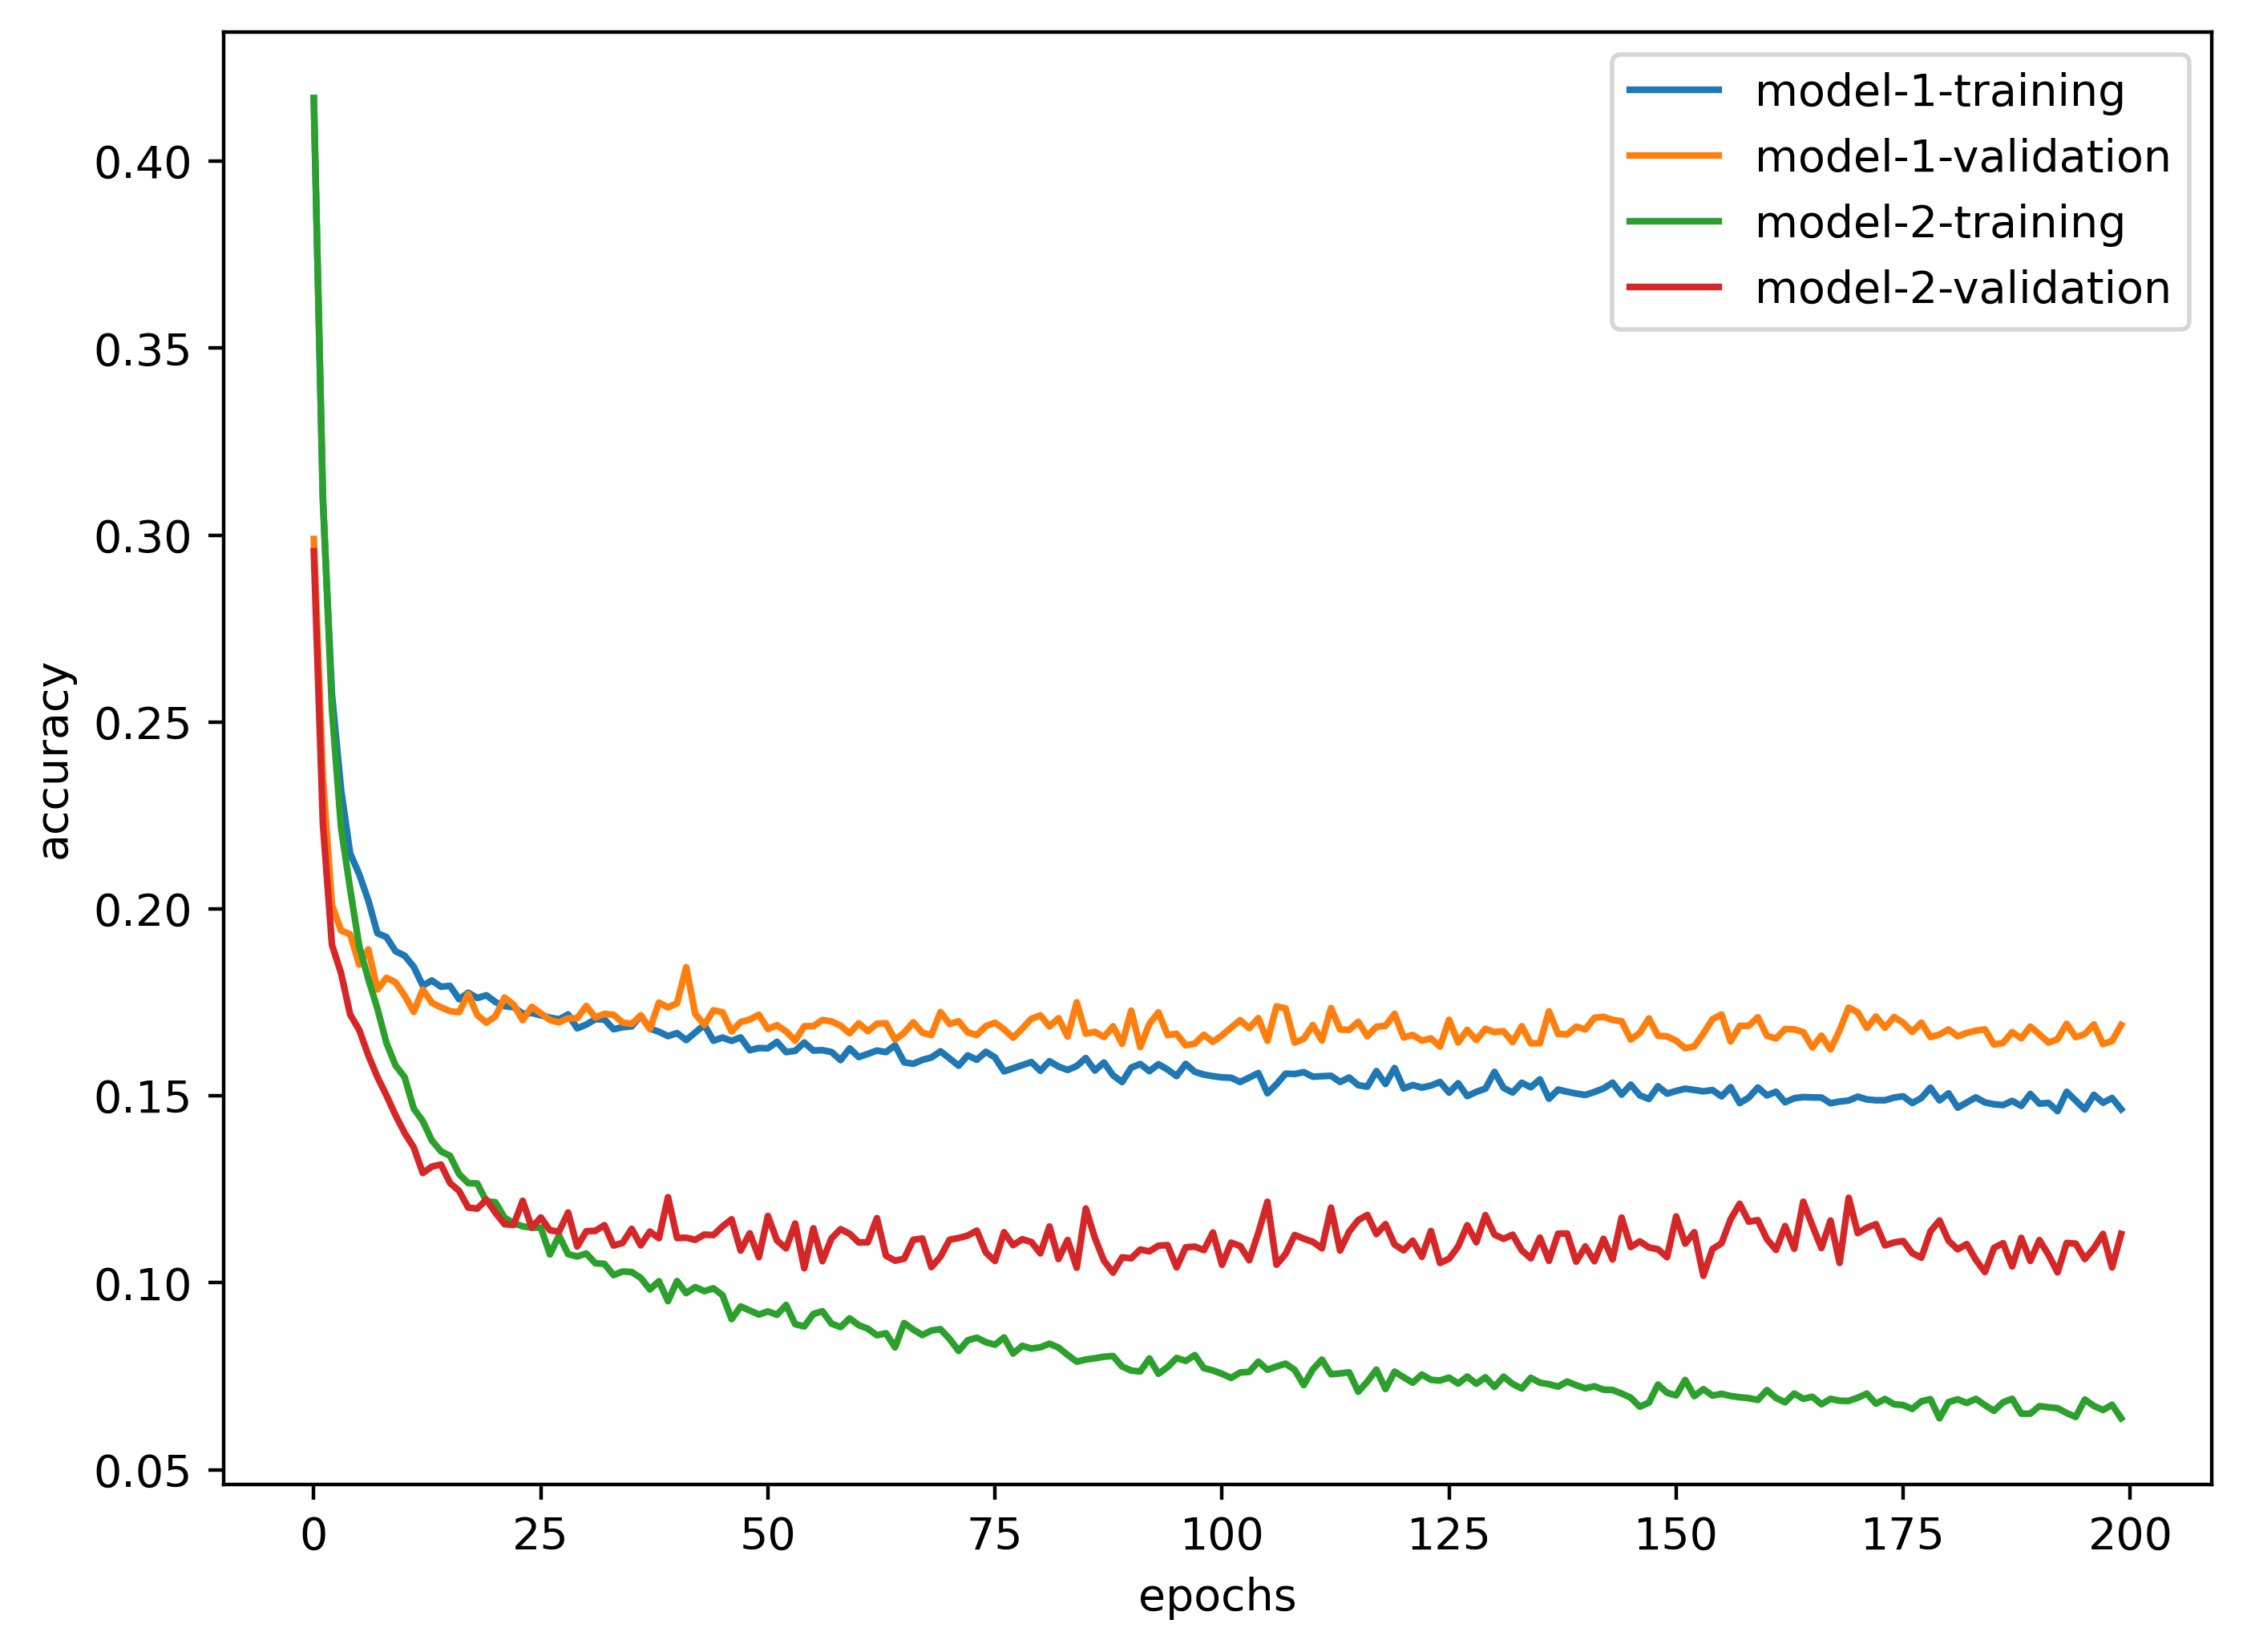

In [56]:
plt.figure(figsize=(8, 6), dpi=400)
plt.plot(history_1.history['loss'], label='model-1-training')
plt.plot(history_1.history['val_loss'], label='model-1-validation')
plt.plot(history_2.history['loss'], label='model-2-training')
plt.plot(history_2.history['val_loss'], label='model-2-validation')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()

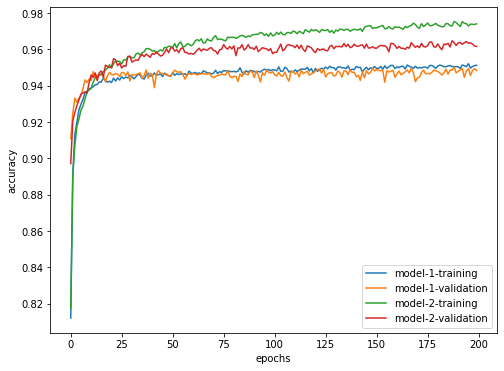

In [57]:
plt.figure(figsize=(8, 6))
plt.plot(history_1.history['binary_accuracy'], label='model-1-training')
plt.plot(history_1.history['val_binary_accuracy'], label='model-1-validation')
plt.plot(history_2.history['binary_accuracy'], label='model-2-training')
plt.plot(history_2.history['val_binary_accuracy'], label='model-2-validation')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()

b)	Verification on the test data

In [58]:
# Load weight of the model-1 with highest accuracy
model_1.load_weights(model_dir + '/Best-model-1.h5')
# Load weight of the model-2 with highest accuracy 
model_2.load_weights(model_dir + '/Best-model-2.h5')
loss_1, accuracy_1 = model_1.evaluate(x_test_normal, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test_one_hot, y_test)
print("Model-1: {}%\nModel-2: {}%".format(accuracy_1, accuracy_2))

313/313 [==============================] - 0s 524us/step - loss: 0.1100 - binary_accuracy: 0.9616
Model-1: 0.949400007724762%
Model-2: 0.9616000056266785%


c)	Pokemon PK

In [60]:
venusaur = np.expand_dims(pokemon_data_one_hot[3], axis=0)    # Pokemon Wonderful frog flower
charizard = np.expand_dims(pokemon_data_one_hot[7], axis=0)   # Pokemon Spitfire Dragon 
blastoise = np.expand_dims(pokemon_data_one_hot[12], axis=0)  # Pokemon Water Arrow Turtle

In [61]:
# # Wonderful frog flower vs Spitfire Dragon
pred = model_2.predict(np.concatenate([venusaur, charizard], axis=-1))
winner = 'Wonderful frog flower ' if pred < 0 else 'Spitfire Dragon'
print("pred={}, {} wins".format(pred, winner))

# Spitfire Dragon vs Water Arrow Turtle
pred = model_2.predict(np.concatenate([charizard, blastoise], axis=-1))
winner = 'Spitfire Dragon' if pred < 0 else 'Water Arrow Turtle'
print("pred={}, {} wins".format(pred, winner))

# Water arrow turtle vs wonderful frog flower
pred = model_2.predict(np.concatenate([blastoise, venusaur], axis=-1))
winner = 'Water Arrow Turtle' if pred < 0 else 'Wonderful frog flower'
print("pred={}, {} wins".format(pred, winner))

pred=[[7.399084]], Spitfire Dragon wins
pred=[[-21.074331]], Spitfire Dragon wins
pred=[[7.528236]], Wonderful frog flower wins
